In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_regression(n_samples= 200, n_features= 1, n_informative=1, n_targets=1, noise= 20)

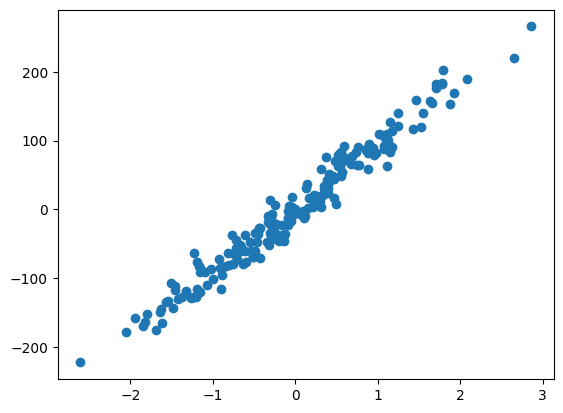

In [5]:
plt.figure()
plt.scatter(X, y)

# using sklearn SGDRegressor class

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [6]:
from sklearn.linear_model import SGDRegressor

In [8]:
reg = SGDRegressor()
reg.fit(X_train, y_train)

SGDRegressor()

In [9]:
y_pred = reg.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y_test, y_pred)

0.9656321281478419

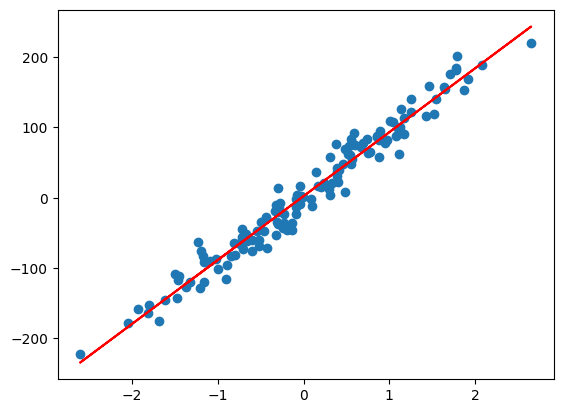

In [13]:
plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color= 'r')

In [14]:
reg.coef_

array([90.88199554])

In [15]:
reg.intercept_

array([2.30963747])

In [18]:
reg._estimator_type

'regressor'

# implementing our own class

In [19]:
class StochasticGradientDescent:
    def __init__(self, lr= 0.01, epochs=100):
        self.lr = lr
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0, X_train.shape[0])
            y_pred = np.dot(X_train[idx], self.coef_) + self.intercept_
            loss = np.mean(np.square(y_train[idx] - y_pred))

            slope_der = -2 * (np.dot((y_train[idx] - y_pred), X_train[idx]))
            intercept_der = -2 * (y_train[idx] - y_pred)

            self.coef_ = self.coef_ - self.lr * slope_der
            self.intercept_ = self.intercept_ - self.lr * intercept_der

            # print(f"loss: {loss}")
            # print(f"coeff_: {self.coef_}")
            # print(f"intercept_: {self.intercept_}")
        print(self.coef_, self.intercept_)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [40]:
sgr = StochasticGradientDescent(0.01, 200)

In [41]:
sgr.fit(X_train, y_train)

[90.91498245] 3.0217812286368413


In [42]:
y_pred = sgr.predict(X_test)

In [43]:
r2_score(y_test, y_pred)

0.9649623265544712